In [ ]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torchvision
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import torch.nn.functional as F
import numpy as np
import pandas as pd
import seaborn as sns

## 1. Классификация предметов одежды (датасет Fashion MNIST)



### 1.1 Решить задачу классификации, не используя сверточные слои. 
* Предложить архитектуру модели для решения задачи
* Посчитать количество параметров модели.
* Обучить модель
* Вывести график функции потерь по эпохам. 
* Используя тестовое множество

  * Продемонстрировать работу модели: вывести несколько изображений, указать над ними правильный класс и класс, предсказанный моделью. 

  * Вывести матрицу ошибок.

  * Вывести значение accuracy на тестовом множестве.
* Сохранить модель

In [ ]:
#загружаем датасета FashionMNIST в переменные MNIST_train и MNIST_test с помощью библиотеки torchvision
MNIST_train = torchvision.datasets.FashionMNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.FashionMNIST('./', download=True, train=False)
MNIST_train.targets

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
#происходит подготовка данных для обучения модели машинного обучения
X_train = MNIST_train.data.float() #приводим значения пикселей изображений к типу float
y_train = MNIST_train.targets
X_test = MNIST_test.data.float()
y_test = MNIST_test.targets

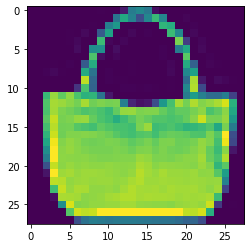

label - Bag


In [ ]:
plt.imshow(X_train[100, :, :])
plt.show()
print('label -', MNIST_train.classes[y_train[100]])

In [ ]:
#Т.к. мы не используем свёрточные сети, то придётся сразу превратить матрицу 28х28 пикселей в вектор
X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28])

In [ ]:
len(MNIST_train.classes)

10

In [ ]:
class MNISTNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons, n_classes):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_classes) 
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x
    
mnist_net = MNISTNet(56, 10)

In [ ]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-4)

In [ ]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test
y_test = y_test

for epoch in range(20):
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        print(X_batch.shape)
        preds = mnist_net.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()

    test_preds = mnist_net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test))
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history.append(accuracy)
    print(accuracy)

Выходные данные были обрезаны до нескольких последних строк (5000).
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([

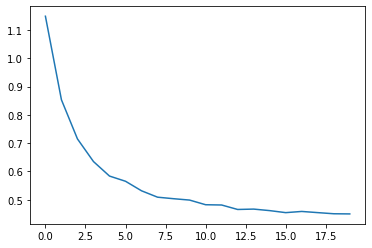

In [ ]:
with torch.no_grad():
    plt.plot(test_loss_history)
    plt.show()

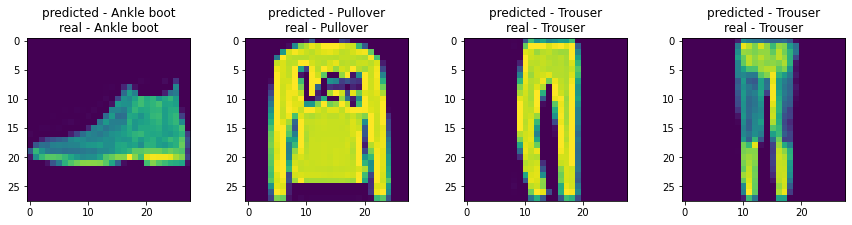

In [ ]:
def show_sample(model, X, y, dataset):
    y_pred = model.forward(X)
    fig, ax = plt.subplots(1, 4, figsize=(15, 3))
    for i in range(4):
        ax[i].imshow(X[i].reshape(28, 28))
        ax[i].set_title(f'predicted - {dataset.classes[y_pred[i].argmax()]}\nreal - {dataset.classes[y[i]]}')
    
show_sample(mnist_net, X_test, y_test, MNIST_test)

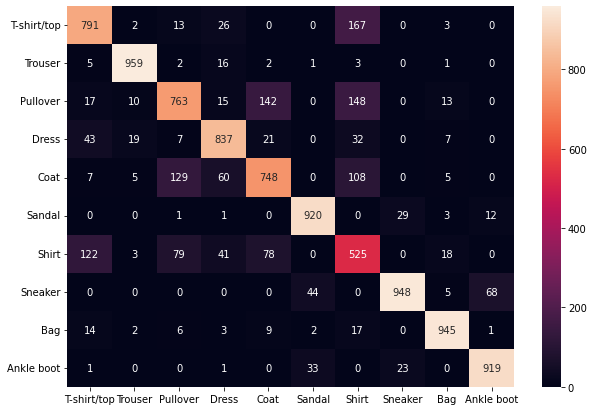

In [ ]:
def show_matrix(model, X, y, dataset):
    heat_map_matrix = torch.zeros((len(dataset.classes), len(dataset.classes)))
    y_pred = model.forward(X).argmax(axis=1)
    for i in range(len(y)):
        heat_map_matrix[y_pred[i], y[i]] += 1
    heat_map_matrix = pd.DataFrame(heat_map_matrix, columns=dataset.classes)
    heat_map_matrix.index = dataset.classes
    
    heat_map_matrix = pd.DataFrame(heat_map_matrix).astype(int)
    plt.figure(1, (10, 7))
    sns.heatmap(heat_map_matrix, annot=True, fmt='g')
    plt.show()

show_matrix(mnist_net, X_test, y_test, MNIST_test)    

In [ ]:
test_preds = mnist_net.forward(X_test)
accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
print(accuracy)

tensor(0.8355)


In [ ]:
torch.save(mnist_net, 'model_1_1.pth')

### 1.2 Решить задачу 1.1, используя сверточную нейронную сеть. 
* Добиться значения accuracy на тестовом множестве не менее 90%
* Визуализировать результаты работы первого сверточного слоя

In [ ]:
X_train = MNIST_train.data.float()
y_train = MNIST_train.targets
X_test = MNIST_test.data.float()
y_test = MNIST_test.targets

X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [ ]:
class MNIST_ConV(torch.nn.Module):
    def __init__(self):
        super(MNIST_ConV, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.act1  = torch.nn.Tanh()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
       
        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2  = torch.nn.Tanh()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        
        self.fc1   = torch.nn.Linear(5 * 5 * 16, 80)
        self.act3  = torch.nn.Tanh()
        
        self.fc2   = torch.nn.Linear(80, 40)
        self.act4  = torch.nn.Tanh()
        
        self.fc3   = torch.nn.Linear(40, 10)
    
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        
        return x
    
mnist_conv = MNIST_ConV()

In [ ]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_conv.parameters(), lr=1.0e-3)

In [ ]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

for epoch in range(20):
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        
        preds = mnist_conv.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()

    test_preds = mnist_conv.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test))
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history.append(accuracy)
    print(accuracy)

tensor(0.8479)
tensor(0.8628)
tensor(0.8811)
tensor(0.8916)
tensor(0.8919)
tensor(0.8895)
tensor(0.9019)
tensor(0.8967)
tensor(0.8986)
tensor(0.9031)
tensor(0.9003)
tensor(0.9027)
tensor(0.9003)
tensor(0.9014)
tensor(0.9017)
tensor(0.9009)
tensor(0.9074)
tensor(0.9044)
tensor(0.9060)
tensor(0.9037)


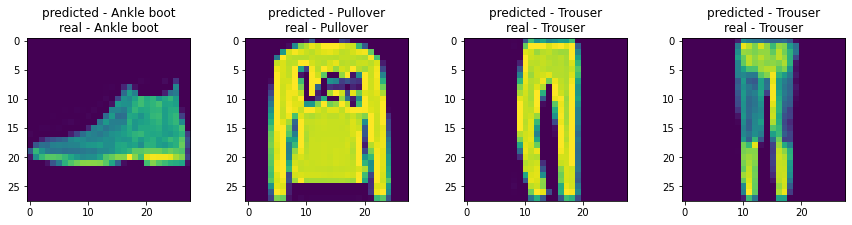

In [ ]:
show_sample(mnist_conv, X_test, y_test, MNIST_test)

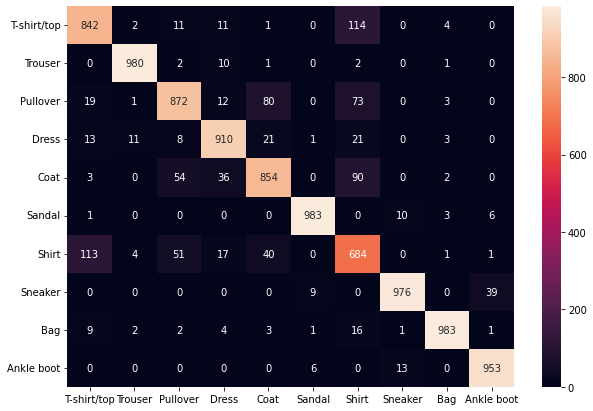

In [ ]:
show_matrix(mnist_conv, X_test, y_test, MNIST_test)

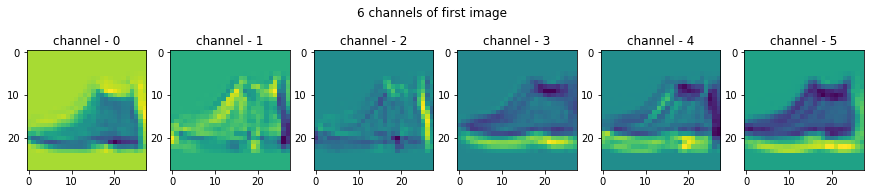

In [ ]:
def show_first_conv(model, X, y, dataset):
    with torch.no_grad():
        first_conv = model.conv1(X)
        fig, ax = plt.subplots(1, first_conv[0].size(0), figsize=(15, 3))
        fig.suptitle(f'{first_conv[0].size(0)} channels of first image')
        for i in range(first_conv[0].size(0)):
            ax[i].imshow(first_conv[0][i])
            ax[i].set_title(f'channel - {i}')

show_first_conv(mnist_conv, X_test, y_test, MNIST_test)

##  2. Классификация изображений (датасет CIFAR 10) 


### 2.1 Решить задачу классификации, не используя сверточные слои. 

* Нормализовать данные (если необходимо)
* Предложить архитектуру модели для решения задачи
* Посчитать количество параметров модели.
* Обучить модель
* Вывести график функции потерь по эпохам. 
* Используя тестовое множество

  * Продемонстрировать работу модели: вывести несколько изображений, указать над ними правильный класс и класс, предсказанный моделью. 

  * Вывести матрицу ошибок.

  * Вывести значение accuracy на тестовом множестве.
* Сохранить модель

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5))])

trainset = datasets.CIFAR10('./', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.CIFAR10('./', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


In [ ]:
def imshow(image, ax=None, title=None, normalize=True):
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

def view_classify(img, ps, version="MNIST"):

    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    elif version == "CIFAR-10":
        ax2.set_yticklabels(["airplane",
                            "automobile",
                            "bird",
                            "cat",
                            "deer",
                            "dog",
                            "frog",
                            "horse",
                            "ship",
                            "truck",], size='small');
        
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

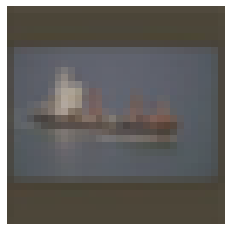

In [ ]:
image, label = next(iter(trainloader))
imshow(image[0,:]);

In [ ]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3*32*32, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [ ]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'Количество параметров: {count_parameters(model)}') 

Количество параметров: 828490


In [ ]:
epochs = 10
train_losses, test_losses = [], []

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        logps = model(images)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0

        with torch.no_grad():
            for test_images, test_labels in testloader:
                test_images = test_images.view(test_images.shape[0], -1)
                logps = model(test_images)
                test_loss += criterion(logps, test_labels)
                ps = torch.exp(logps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == test_labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
        print("Epoch {}/{}..".format(e+1, epochs),
              "Training loss: {:.3f}..".format(train_losses[-1]),
              "Test loss: {:.3f}..".format(test_losses[-1]),
              "Test Accuracy: {:.3f}%".format(accuracy/len(testloader)))

Epoch 1/10.. Training loss: 1.713.. Test loss: 1.588.. Test Accuracy: 0.443%
Epoch 2/10.. Training loss: 1.530.. Test loss: 1.490.. Test Accuracy: 0.475%
Epoch 3/10.. Training loss: 1.439.. Test loss: 1.480.. Test Accuracy: 0.486%
Epoch 4/10.. Training loss: 1.372.. Test loss: 1.435.. Test Accuracy: 0.503%
Epoch 5/10.. Training loss: 1.315.. Test loss: 1.463.. Test Accuracy: 0.490%
Epoch 6/10.. Training loss: 1.273.. Test loss: 1.424.. Test Accuracy: 0.503%
Epoch 7/10.. Training loss: 1.233.. Test loss: 1.455.. Test Accuracy: 0.506%
Epoch 8/10.. Training loss: 1.196.. Test loss: 1.410.. Test Accuracy: 0.519%
Epoch 9/10.. Training loss: 1.146.. Test loss: 1.442.. Test Accuracy: 0.514%
Epoch 10/10.. Training loss: 1.120.. Test loss: 1.445.. Test Accuracy: 0.515%


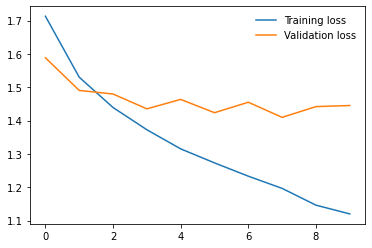

In [ ]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False);

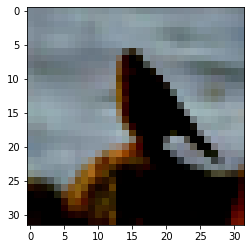

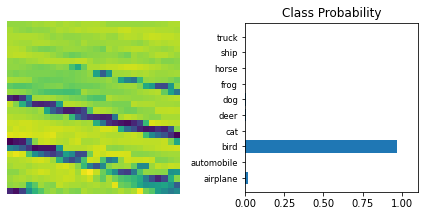

In [ ]:
model.eval()

dataiter = iter(testloader)
images, labels = next(dataiter)
img = images[0]
img = img.view(1, 3*32*32)

with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)
plt.imshow(images[0].permute(1,2,0))
view_classify(images[0], ps, version='CIFAR-10')

In [ ]:
test_loss = 0
accuracy = 0
predict = []
true_label = []

with torch.no_grad():
    for test_images, test_labels in testloader:
        test_images = test_images.view(test_images.shape[0], -1)
        logps = model(test_images)
        test_loss += criterion(logps, test_labels)
        ps = torch.exp(logps)
        top_p, top_class = ps.topk(1, dim=1)
        predict.append(top_class)
        true_label.append(test_labels.view(*top_class.shape))

In [ ]:
torch.vstack(predict).flatten().shape,torch.vstack(true_label).flatten().shape

(torch.Size([10000]), torch.Size([10000]))

In [ ]:
class_names = ["airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",]
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(torch.vstack(true_label).flatten().numpy(), torch.vstack(predict).flatten().numpy())

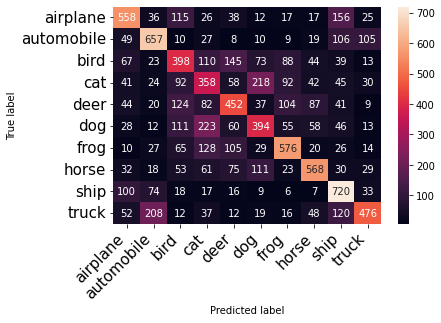

In [ ]:
df_cm = pd.DataFrame(conf_mat, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label');

### 2.2 Решить задачу 2.1, используя сверточную нейронную сеть. 
* Добиться значения accuracy на тестовом множестве не менее 70%.
* Визуализировать результаты работы первого сверточного слоя

In [ ]:
from torchvision import models
from tqdm.notebook import tqdm

In [ ]:
class Classifier(torch.nn.Module):
    def __init__(self):
        super().__init__()
        model = models.resnet18(pretrained=False)
        model.fc = nn.Linear(512, 10)
        self.model = model
    
    def forward(self, data):
        out = self.model(data.reshape((data.shape[0],3,32,32)))
        return out

In [ ]:
model = Classifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'Количество параметров: {count_parameters(model)}') 

Количество параметров: 11181642


In [ ]:
epochs = 10
train_losses, test_losses = [], []

for e in range(epochs):
    running_loss = 0
    
    pbar = tqdm(trainloader)
    for images, labels in pbar:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        logps = model(images)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0
        with torch.no_grad():
            for test_images, test_labels in testloader:
                test_images = test_images.view(test_images.shape[0], -1)
                logps = model(test_images)
                test_loss += criterion(logps, test_labels)
                ps = torch.exp(logps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == test_labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
        print("Epoch {}/{}..".format(e+1, epochs),
              "Training loss: {:.3f}..".format(train_losses[-1]),
              "Test loss: {:.3f}..".format(test_losses[-1]),
              "Test Accuracy: {:.3f}%".format(accuracy/len(testloader)))

  0%|          | 0/782 [00:00<?, ?it/s]

Epoch 1/10.. Training loss: 1.476.. Test loss: 1.176.. Test Accuracy: 0.587%


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch 2/10.. Training loss: 1.045.. Test loss: 0.967.. Test Accuracy: 0.667%


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch 3/10.. Training loss: 0.850.. Test loss: 0.839.. Test Accuracy: 0.710%


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch 4/10.. Training loss: 0.723.. Test loss: 0.796.. Test Accuracy: 0.726%


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch 5/10.. Training loss: 0.611.. Test loss: 0.778.. Test Accuracy: 0.736%


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch 6/10.. Training loss: 0.517.. Test loss: 0.737.. Test Accuracy: 0.753%


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch 7/10.. Training loss: 0.431.. Test loss: 0.769.. Test Accuracy: 0.754%


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch 8/10.. Training loss: 0.344.. Test loss: 0.808.. Test Accuracy: 0.757%


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch 9/10.. Training loss: 0.270.. Test loss: 0.818.. Test Accuracy: 0.763%


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch 10/10.. Training loss: 0.220.. Test loss: 0.970.. Test Accuracy: 0.750%


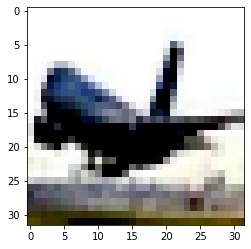

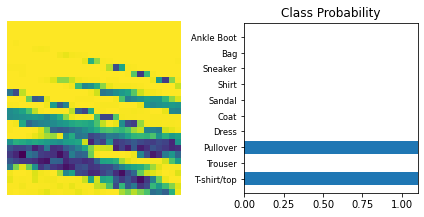

In [ ]:
model.eval()

dataiter = iter(testloader)
images, labels = next(dataiter)
img = images[0]
img = img.view(1, 3*32*32)

with torch.no_grad():
    output = model.forward(img)

ps = output
plt.imshow(images[0].permute(1,2,0))

view_classify(img, ps, version='Fashion')

In [ ]:
def saliency(img, model):
    for param in model.parameters():
        param.requires_grad = False

    model.eval()
    input = img
    input.unsqueeze_(0)

    input.requires_grad = True
    preds = model(input)
    score, indices = torch.max(preds, 1)
    score.backward()
    
    slc, _ = torch.max(torch.abs(input.grad[0]), dim=0)

    plt.imshow(np.transpose(input[0].detach().numpy(), (1, 2, 0)))
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1, 2, 2)
    plt.imshow(slc.numpy(), cmap=plt.cm.hot)
    plt.xticks([])
    plt.yticks([])
    return slc

<ipython-input-42-78db7cc942e4>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  saliency(torch.tensor(images[0]),model);
<ipython-input-41-01f066087add>:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


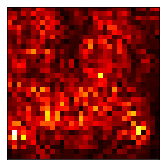

In [ ]:
saliency(torch.tensor(images[0]),model);

## 3. Загрузка изображений из внешних источников

### 3.1 Решить задачу классификации обезьян (датасет [monkey.zip](https://disk.yandex.ru/d/OxYgY4S7aR6ulQ)).
* Загрузить архив с данными на диск
* Создать датасет на основе файлов при помощи `torchvision.datasets.ImageFolder`
* Преобразовать изображения к тензорами одного размера (например, 400х400). Потестировать другие преобразования из `torchvision.transforms`
* Предложить архитектуру модели для решения задачи. Обучить модель.
* Используя тестовое множество

  * Продемонстрировать работу модели: вывести несколько изображений, указать над ними правильный класс и класс, предсказанный моделью. 

  * Вывести матрицу ошибок.

  * Вывести значение accuracy на тестовом множестве.
  * Добиться значения accuracy на тестовом множестве не менее 60%

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
from tqdm import tqdm

#zf = zipfile.ZipFile('/content/drive/MyDrive/monkeys.zip', 'r')
#for file in tqdm(zf.infolist()):
#    zf.extract(file)
file_path = '/content/drive/MyDrive/monkeys.zip'
zf = zipfile.ZipFile(file_path, 'r')
zf.extractall('/content/extracted_data')
zf.close()

In [ ]:
monkeys_train_dl = torch.utils.data.DataLoader(monkeys_train, 16, shuffle=True, 
                          num_workers=4, pin_memory=True)
monkeys_test_dl = torch.utils.data.DataLoader(monkeys_test, 16,
                        num_workers=4, pin_memory=True)

In [ ]:
import torch.nn as nn

class MonkeyModel(nn.Module):
    def __init__(self):
        super(MonkeyModel, self).__init__()
        self.layer1 = nn.Sequential(nn.Conv2d(3, 32, kernel_size=5, stride=1, padding = 1), 
        nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(nn.Conv2d(32, 64, kernel_size=5, stride=1, padding = 1), 
        nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer3 = nn.Sequential( nn.Conv2d(64, 128, kernel_size=5, stride=1, padding = 1),
        nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2))
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(12800, 1000)
        self.fc2 = nn.Linear(1000, 10)
        
    def forward(self, x):
        out = self.layer1(x) 
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.reshape(out.size(0), -1)
        out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [ ]:
model = MonkeyModel()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-4)

In [ ]:
num_epochs = 20
test_loss_history = []
test_accuracy_history = []

for epoch in range(num_epochs):
    print('Epoch - ', epoch)
    for i, (images, labels) in enumerate(monkeys_train_dl):
        optimizer.zero_grad()
        
        preds = model.forward(images) 
        
        loss_value = criterion(preds, labels)
        loss_value.backward()
        
        optimizer.step()
    
    accuracy = 0
    size = 0
    for i, (images, labels) in enumerate(monkeys_test_dl):
        test_preds = model.forward(images)
        test_loss_history.append(criterion(test_preds, labels))

        accuracy += (test_preds.argmax(dim=1) == labels).float().sum()
        size += len(images)
    test_accuracy_history.append(accuracy/size)
    print(accuracy/size)

In [ ]:
torch.save(model.state_dict(), '3_1.pth')

### 3.2 Решить задачу классификации собак и кошек (датасет [cats_dogs.zip](https://disk.yandex.ru/d/wQtt5O1JF9ctnA)).
* Загрузить архив с данными на диск
* Создать датасет на основе файлов при помощи `torchvision.datasets.ImageFolder`
* Преобразовать изображения к тензорами одного размера (например, 400х400). Потестировать другие преобразования из `torchvision.transforms`
* Предложить архитектуру модели для решения задачи. Обучить модель.
* Используя тестовое множество

  * Продемонстрировать работу модели: вывести несколько изображений, указать над ними правильный класс и класс, предсказанный моделью. 

  * Вывести матрицу ошибок.

  * Вывести значение accuracy на тестовом множестве.
  * Добиться значения accuracy на тестовом множестве не менее 80%

In [ ]:
from  torchvision import transforms
from tqdm import tqdm 
transform = torchvision.transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize([64, 64]),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
]
)


trainset = datasets.ImageFolder('/cats_dogs.zip/train', transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

testset = datasets.ImageFolder('/cats_dogs.zip/train', transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=True)

In [ ]:
image, label = next(iter(trainloader))
imshow(image[0,:]);

In [ ]:
class Classifier(torch.nn.Module):
    def __init__(self):
        super().__init__()
        model = models.resnet18(pretrained=False)
        model.fc = nn.Linear(512, 2)
        self.model = model
    
    def forward(self, data):
        return self.model(data)

In [ ]:
model = Classifier()
criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.003)

In [ ]:
epochs = 4
train_losses, test_losses = [], []
torch.set_grad_enabled(True)  

for e in range(epochs):
    running_loss = 0
    pbar = tqdm(trainloader)
    for images, labels in pbar:
        optimizer.zero_grad()
        logps = model(images)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0
        
        with torch.no_grad():
            for test_images, test_labels in testloader:
                logps = model(test_images)
                test_loss += criterion(logps, test_labels)
                ps = torch.exp(logps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class.cpu().detach() == test_labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
        print("Epoch {}/{}..".format(e+1, epochs),
              "Training loss: {:.3f}..".format(train_losses[-1]),
              "Test loss: {:.3f}..".format(test_losses[-1]),
              "Test Accuracy: {:.3f}%".format(accuracy/len(testloader)))

In [ ]:
test_loss = 0
accuracy = 0
predict = []
true_label = []

with torch.no_grad():
    for test_images, test_labels in testloader:
        logps = model(test_images)
        test_loss += criterion(logps, test_labels)
        ps = torch.exp(logps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class.cpu().detach() == test_labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))
        predict.append(top_class.cpu().detach())
        true_label.append(test_labels.view(*top_class.shape))

torch.vstack(predict).flatten().shape,torch.vstack(true_label).flatten().shape

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(torch.vstack(true_label).flatten().numpy(), torch.vstack(predict).flatten().numpy())
print(conf_mat)

In [ ]:
model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]

with torch.no_grad():
    output = model.forward(img.unsqueeze(0))

ps = output
plt.imshow(images[0].permute(1,2,0))

"predict",ps.argmax(),"true",labels[0]

In [ ]:
class_names =   list(range(2))
df_cm = pd.DataFrame(conf_mat, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
torch.save(model.state_dict(), '3_2.pth')

# 4. Transfer Learning

### 4.1 Решить задачу 3.1, воспользовавшись предобученной моделью VGG16
* Загрузить данные для обучения
* Преобразования: размер 224x224, нормализация с параметрами `mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)`
* Заменить последний полносвязный слой модели в соответствии с задачей
* Дообучить модель (не замораживать веса). Вычислить значение accuracy на тестовом множестве
* Дообучить модель (заморозить все веса, кроме последнего блока слоев (`classifier`)). 
* Вычислить значение accuracy на тестовом множестве.


### 4.2 Решить задачу 3.2, воспользовавшись подходящей предобученной моделью
* Не использовать VGG16 (вместо нее можно взять resnet18 или другую)
* Загрузить данные для обучения
* Преобразования: размер 224x224, нормализация с параметрами `mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)`
* Заменить последний полносвязный слой модели в соответствии с задачей
* Дообучить модель. 
* Вычислить значение accuracy на тестовом множестве (добиться значения не меньше 97-98%)